<a href="https://colab.research.google.com/github/kikimiya0606/2025-1-A-myclass-BDA/blob/main/inclass/13w_A_mon_0609_easy_ch10_text_mining_BTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 13주 BTS 댓글 워드 클라우드

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.8 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:
!find / -name NanumGothic.ttf

/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf
find: ‘/proc/70/task/70/net’: Invalid argument
find: ‘/proc/70/net’: Invalid argument


In [ ]:
FONT_PATH = '/usr/local/lib/python3.11/dist-package/koreanize_matplotlib/fonts/NanumGothic.ttf'

In [ ]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [ ]:
!pip show konlpy

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 20.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 5.71 MiB | 5.25 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
df = pd.read_csv('data/news_comment_BTS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [ ]:
df.sample(5)

,reg_time,reply,press,title,url
1086,2020-09-01 11:57:05,국민의 힘빼는당이 정권을 잡았다면 절대 일어날수 없는 일이다.다까끼마사오 쥐맹닭그네...,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
23,2020-09-01 08:04:04,일본 부들부들,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
756,2020-09-01 03:20:34,이건 진짜 그냥 미친거임 ..ㄷ ㄷ ㄷ,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
1142,2020-09-01 08:25:16,축하합니다~,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
556,2020-09-01 06:42:54,와 손발이 덜덜 떨리네 다음주면 1위 찍힌거 볼수있으려나? 아미가 아니라서 잘 모르겟네,뉴시스,BTS '다이너마이트' 빌보드 '핫100' 1위…한국가수 최초,https://news.naver.com/main/read.nhn?mode=LSD&...


In [ ]:
df.reply[:10]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
5,정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6,정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7,"기자는 자고 일어났지만, 팬들은 못자고 발표 기다림"
8,자랑스럽다!!!!!! 축하합니다!!!!
9,SuperM 늘 응원하고 사랑합니다~


In [ ]:
df['reply'].str.replace('[^가-힣]', '', regex=True)

,reply
0,국보소년단
1,아줌마가들어도좋더라
2,팩트체크현재빌보드위방탄소년단위위위위위위위위위
3,방탄소년단이한국사람이라너무자랑스러워요우리오래오래함께하자
4,대단한월드클래스는다르네좋은소식응원해요
...,...
1195,역시
1196,우리탄이들너무자랑스럽고사랑해
1197,이런애들꼭군대를보내는게맞을까요
1198,군면제급이다이건


In [ ]:
from konlpy.tag import Hannanum
han = Hannanum()
han.nouns('질문의나 건의사항은 깃헙 이슈 트레커에 남겨주세요.')

['질문', '건의사항', '깃헙', '이슈', '트레커']

In [ ]:
from konlpy.tag import Kkma
Kkma = Kkma()
Kkma.nouns('질문의나 건의사항은 깃헙 이슈 트레커에 남겨주세요.')

['질문', '나', '건의', '건의사항', '사항', '깃헙', '이슈', '트레커']

In [ ]:
mydf = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 5]})
mydf

,A,B
0,1,4
1,2,5
2,3,5


In [ ]:
dfs = mydf.apply(lambda x : x**2)
dfs

,A,B
0,1,16
1,4,25
2,9,25


In [ ]:
dfs = mydf.apply(lambda x : x + 2)
dfs

,A,B
0,3,6
1,4,7
2,5,7


In [ ]:
df['reply'].sample(5)

,reply
312,추카추카~~~<U+0001F44D><U+0001F44D><U+0001F44D>
160,대박 1위라니...
1021,국뽕이 하늘을 찌르는구나
601,do you know bts?
744,케이팝 케이팝.... 방탄한탄 케이팝거리는거 넘.....\n방탄은 그냥 케이팝이 아...


In [28]:
nouns = df['reply'].apply(Kkma.nouns)
nouns

,reply
0,"[국보, 국보소년단, 소년단, 0001, 49]"
1,[아줌마]
2,"[팩트, 팩트체크, 체크, 보드, 100, 1, 1위, 위, 방탄, 방탄소년단, 소..."
3,"[방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]"
4,"[월드, 클래스, 소식, 응원]"
...,...
1195,[]
1196,"[우리, 탄, 자랑, 사랑, 0001, 49]"
1197,"[애, 군대]"
1198,"[군, 군면제급, 면제, 급]"


In [29]:
nouns = nouns.explode()
nouns

,reply
0,국보
0,국보소년단
0,소년단
0,0001
0,49
...,...
1199,전
1199,전정국
1199,정국
1199,0001


In [33]:
test = pd.DataFrame({'A': [[1, 2, 3], 'foo', [], [3, 4]], 'B':1,
                    'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [34]:
test.explode('A') #기말 시험 예상

,A,B,C
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
0,3,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [36]:
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [37]:
test.explode(['A', 'C']) #기말 시험 예상

,A,B,C
0,1,1,a
0,2,1,b
0,3,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


In [38]:
df_word = pd.DataFrame({'word': nouns})
df_word.sample(5)

,word
795,핫백
842,함
1087,수
90,0001
526,믄


In [39]:
df_word['len'] = df_word['word'].str.len()
df_word = df_word.query('len >= 2')
df_word.sample(5)

,word,len
458,보드,2.0
287,이제,2.0
464,문씨,2.0
653,전세계,3.0
667,메달,2.0


In [40]:
df_word.query('word == "소년단"')

,word,len
0,소년단,3.0
2,소년단,3.0
3,소년단,3.0
27,소년단,3.0
29,소년단,3.0
...,...,...
1123,소년단,3.0
1159,소년단,3.0
1162,소년단,3.0
1164,소년단,3.0


In [41]:
df_word = df_word.groupby('word', as_index=False) \
          .agg(n = ('word', 'count')) \
          .sort_values('n', ascending=False)
df_word

,word,n
944,방탄,280
2075,축하,237
1754,자랑,206
1234,소년단,143
39,1위,137
...,...,...
2357,흑인인권운동,1
2358,흥행,1
2359,희대,1
2361,희안,1


In [42]:
top20 = df_word.head(20)
top20

,word,n
944,방탄,280
2075,축하,237
1754,자랑,206
1234,소년단,143
39,1위,137
0,0001,137
955,방탄소년단,134
1010,보드,131
808,면제,126
99,49,80


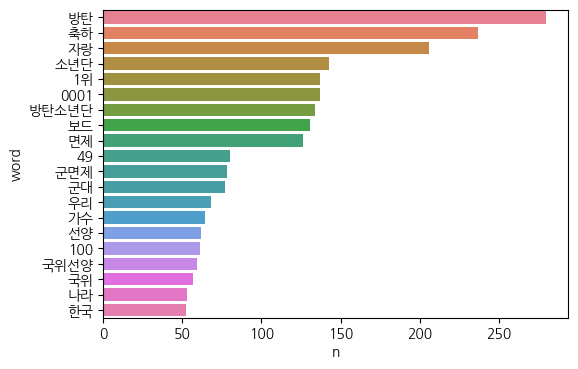

In [43]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top20, y='word', x='n', hue='word');

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
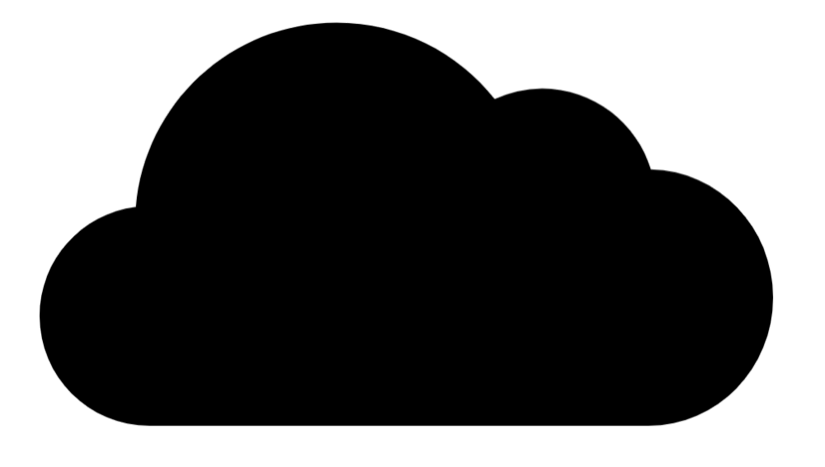

In [44]:
from PIL import Image
icon = Image.open('data/cloud.png')

img = Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)

img = np.array(img)
img

In [45]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2367 entries, 944 to 2363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    2367 non-null   object
 1   n       2367 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 55.5+ KB


In [46]:
df_word.sample(5)

,word,n
1217,세계아미,1
922,박진영,1
585,다양성,1
2141,탈세,1
463,금메달100배,1


In [47]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'방탄': 280,
 '축하': 237,
 '자랑': 206,
 '소년단': 143,
 '1위': 137,
 '0001': 137,
 '방탄소년단': 134,
 '보드': 131,
 '면제': 126,
 '49': 80,
 '군면제': 78,
 '군대': 77,
 '우리': 68,
 '가수': 64,
 '선양': 62,
 '100': 61,
 '국위선양': 59,
 '국위': 57,
 '나라': 53,
 '한국': 52,
 '진짜': 51,
 '노래': 50,
 '대한민국': 46,
 '민국': 46,
 '대한': 46,
 '축하해': 43,
 '최고': 40,
 '대박': 39,
 '아미': 35,
 '세계': 34,
 '소식': 31,
 '핫100': 31,
 '시기': 30,
 '생각': 30,
 '행복': 29,
 '정국': 29,
 '라니': 29,
 '사람': 29,
 '44': 29,
 '역사': 28,
 '코로나': 27,
 '사랑': 27,
 '생일': 27,
 '차트': 27,
 '정도': 25,
 '우리나라': 25,
 '이것': 24,
 '감사': 24,
 '그룹': 22,
 '진심': 22,
 '미국': 22,
 '싱글': 22,
 '인정': 22,
 '전세계': 22,
 '389': 21,
 '노력': 21,
 '응원': 20,
 '핫백': 19,
 '요즘': 19,
 '음악': 19,
 '1위라니': 19,
 '활동': 19,
 '고생': 18,
 '아이': 17,
 '최초': 17,
 '기사': 15,
 '국가': 15,
 '때문': 15,
 '마이트': 15,
 '뉴스': 15,
 '국민': 15,
 '올림픽': 15,
 '너희': 15,
 '멤버': 14,
 '숟가락': 14,
 '문화': 14,
 '기분': 14,
 '대통령': 14,
 '60': 14,
 '시국': 13,
 '이제': 13,
 '이름': 13,
 '지금': 13,
 '아티스트': 13,
 '눈물': 13,
 '한국인': 13,
 '아시아': 12,
 '내가

In [52]:
wc = WordCloud(random_state=1234, font_path=FONT_PATH,
               width = 400, height=400, background_color='white',
               mask = img)

In [53]:
%config inlineBackend.figure_format = 'retina'

In [56]:
imgWC = wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(6, 4));
plt.axis('off')
plt.imshow(imgWC);

OSError: cannot open resource

# 기말고사 예상

In [58]:
import pandas as pd

df = pd.DataFrame ({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})

df

,A,B
0,1,10
1,2,20
2,3,30


In [59]:
print(df.apply(lambda x: x.max() - x.min(), axis=0))

A     2
B    20
dtype: int64


In [60]:
print(df.apply(lambda x: x.mean(), axis=1))

0     5.5
1    11.0
2    16.5
dtype: float64


In [61]:
print(df.apply(lambda x: x.max() - x.min(), axis=1))

0     9
1    18
2    27
dtype: int64


In [62]:
f = lambda x: x + 5
df.apply(f)

,A,B
0,6,15
1,7,25
2,8,35


In [63]:
f = lambda x: x * 5
df.apply(f)

,A,B
0,5,50
1,10,100
2,15,150


In [64]:
f = lambda x: x / 5
df.apply(f)

,A,B
0,0.2,2.0
1,0.4,4.0
2,0.6,6.0


In [65]:
print(df.apply(lambda x: x.mean(), axis=1))

0     5.5
1    11.0
2    16.5
dtype: float64


In [66]:
print(df.apply(lambda x: x.mean(), axis=0))

A     2.0
B    20.0
dtype: float64


In [67]:
df

,A,B
0,1,10
1,2,20
2,3,30


In [68]:
df.apply(lambda x: x.sum(), axis=0)

,0
A,6
B,60


In [69]:
df.apply(sum, axis=0)

,0
A,6
B,60


In [70]:
df.apply(sum, axis=1)

,0
0,11
1,22
2,33


In [71]:
df.sum(axis=0)

,0
A,6
B,60


In [72]:
df.sum(axis=1)

,0
0,11
1,22
2,33


In [73]:
import pandas as pd

df = pd.DataFrame({
    'name': ['Alice', 'Bob'],
    'hobbles': [['reading', 'cooking'], ['gaming']]
})
df

,name,hobbles
0,Alice,"[reading, cooking]"
1,Bob,[gaming]


In [ ]:
df_exploded = df.explode('hobbies')


In [77]:
df = pd.DataFrame({
    'A':[[1, 2], [3]],
    'B':[['a', 'b']]
})

ValueError: All arrays must be of the same length

In [75]:
display_side_by_side(df, df.explode(['A', 'B']))

KeyError: 'A'

In [74]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

# 종료